# 2_Used_Car_Website_Sales_Trends_Analysis

<a id='back'><a/>
# Table of Contents
    
- [1. Used Car Website Sales Trends Analysis Overview](#1)
- [2. General Information Review](#2)
- [3. Data Preprocessing](#3)
    - [3.1 Dropping or Filling in Missing Values](#3.1)
    - [3.2 Changing Data Types](#3.2)
    - [3.3 Additional Information to Include](#3.3)
    - [3.4 Conclusion](#3.4)
- [4. Exploratory Data Analysis](#4)
- [5. Ad Analysis](#5)
    - [5.1 Ad Lifetime](#5.1)
    - [5.2 Ads by Vehicle Type](#5.2)
    - [5.3 Factors that Impact Price](#5.3)
        - [5.3.1 Age](#5.3.1)
        - [5.3.2 Mileage](#5.3.2)
        - [5.3.3 Condition](#5.3.3)
        - [5.3.4 Transmission Type](#5.3.4)
            - [5.3.4.1 SUV](#5.3.4.1)
            - [5.3.4.2 Sedan](#5.3.4.2)
        - [5.3.5 Color](#5.3.5)
            - [5.3.5.1 SUV](#5.3.5.1)
            - [5.3.5.2 Sedan](#5.3.5.2)
- [6. General Conclusion](#6)

<a id='1'><a/>
# 1 Used Car Website Sales Trends Analysis Overview
[Return to Table of Contents](#back)

Crankshaft List is a website that publishes free advertisements for vehicles for sale. Over the years, they have collected data on these advertisements and we will proceed to study this data to determine which factors influence the price of a vehicle, focusing on the two types of cars with the most ads. We will also look to describe the typical lifetime of an ad. To complete this analysis, we will perform the following:
<ul>
 <li>Data Preprocessing</li>
 <li>Exploratory Data Analysis</li>
 <li>Ad Analysis</li>
 </ul>
 
At the end of our study, we will provide a General Conclusion on our findings of the above.

<a id='2'><a/>
# 2 General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

In [2]:
# read all input data

try: 
    df= pd.read_csv('vehicles_us (1).csv')  # local path
except:
    df= pd.read_csv('/datasets/vehicles_us.csv')  # server path

In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 24.3 MB


In [6]:
df.duplicated().sum()

0

**General Information Key Points:**
<ul>
    <li>There are 51,525 rows, or customers, presented in the data </li>
    <li>There are 3 series with missing values: 'model_year', 'cylinders', 'odometer', 'paint_color' and is_4wd (though the last is likely due to the fact that this series acts as a boolean and the missing values indicate that the vehicle has no 4wd)</li>
    <li>Several data types will need to be converted: 'model_year', 'condition', 'cylinders', 'type', 'is_4wd', and 'date_posted. The file at 24.3MB is considerably large. The data type changes should address this'</li>
    <li>Standard deviation is high for 'price', 'model_year', and 'days_listed'. Also for 'price' and 'odometer' the mean is higher than the mean, indicating that the data is skewed and we should use 'median' verus 'mean' to replace any missing values   </li>
    <li>There appear to be some data irregularities in select series. 'Price' and 'odometer' have unusually high max values, meaning those are outliers that should be removed  </li>
    <li>There are no duplicates</li>
    </ul>

<a id='3'><a/>
# 3 Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Dropping or Filling in Missing Values
[Return to Table of Contents](#back)

In [7]:
# missing values as numbers

df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
# missing values as a percentage of the entire dataset

round(df.isnull().sum() / len(df),4)*100

price            0.00
model_year       7.02
model            0.00
condition        0.00
cylinders       10.21
fuel             0.00
odometer        15.32
transmission     0.00
type             0.00
paint_color     17.99
is_4wd          50.37
date_posted      0.00
days_listed      0.00
dtype: float64

In [9]:
# filling the nulls with 0 as explained above

df['is_4wd'].fillna(0,inplace=True)

In [10]:
# filling in missing values for cylinders

df.pivot_table(index='type', values='cylinders', aggfunc=['median','mean']) 

,median,mean
,cylinders,cylinders
type,,
SUV,6.0,5.905017
bus,10.0,9.100000
convertible,8.0,6.963415
coupe,6.0,6.451225
hatchback,4.0,4.159215
mini-van,6.0,5.966151
offroad,6.0,6.177083
other,6.0,5.688889


We can replace the missing cylinders values based on the type of vehicle, using the median, or the number of cylinders that appear the most per category. Larger cars usually equate to more cylinders which we see in the data above.

In [11]:
df['cylinders'] = df.groupby(['type'])['cylinders'].apply(lambda x: x.fillna(x.median()))

In [12]:
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.303726,-0.420299,0.315145,-0.000682
model_year,0.428656,1.000000,-0.141682,-0.473948,0.043384,-0.005703
cylinders,0.303726,-0.141682,1.000000,0.089310,0.413894,0.002932
odometer,-0.420299,-0.473948,0.089310,1.000000,0.036267,0.003804
is_4wd,0.315145,0.043384,0.413894,0.036267,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.002932,0.003804,0.002003,1.000000


There is a negative correlation between model_year and odometer. Though the correlation could be stronger, we can use both model and model_year to fill in the missing values for odometer. For model_year, we will need to drop the missing values as there is not a reliable way to fill in this information.

In [13]:
df['odometer'] = df.odometer.fillna(df.groupby(['model', 'model_year'])[ 'odometer'].transform(np.median))

In [14]:
# models come in different colors; as we cannot guest customer preference, best to fill in as "undefined"

df['paint_color'] = df['paint_color'].fillna('undefined')

In [15]:
# test to see how many missing values for odometer were replaced

df.isnull().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer         625
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<a id='3.2'><a/>
## 3.2 Changing Data Types
[Return to Table of Contents](#back)

In [18]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [19]:
for c in df.select_dtypes(include ='object').columns: 
    print()
    print(c)
    print(df[c].value_counts())


model
ford f-150                  2602
chevrolet silverado 1500    2016
ram 1500                    1633
chevrolet silverado         1172
jeep wrangler               1049
                            ... 
acura tl                     224
chrysler 200                 223
kia sorento                  220
ford f-250 super duty        219
nissan murano                215
Name: model, Length: 99, dtype: int64

condition
excellent    23026
good         18677
like new      4407
fair          1485
new            133
salvage        102
Name: condition, dtype: int64

fuel
gas         43946
diesel       3405
hybrid        371
other         102
electric        6
Name: fuel, dtype: int64

transmission
automatic    43524
manual        2634
other         1672
Name: transmission, dtype: int64

type
truck          11506
SUV            11478
sedan          11296
pickup          6480
coupe           2153
wagon           1431
mini-van        1075
hatchback        973
van              558
convertible      

The following should be converted to ints: 'model_year', 'cylinders', 'odometer'. This is because these metrics should appear as whole numbers.
The following should be convered to category: 'fuel', 'transmission', 'type' and 'paint_color'. This is because there is a limited set of options for these items. 'Condition' we will leave for now as it will be converted to numbers later in this project. 'Date_posted' also needs to be converted to datetime.

In [20]:
for col in ['model_year','cylinders','odometer']:
    df[col] = df[col].astype('int')

In [21]:
for col in ['fuel','transmission','type','paint_color']:
    df[col] = df[col].astype('category')

In [22]:
df['date_posted']= pd.to_datetime(df['date_posted'])

In [23]:
# check on reduction of memory usage

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47830 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47830 non-null  int64         
 1   model_year    47830 non-null  int64         
 2   model         47830 non-null  object        
 3   condition     47830 non-null  object        
 4   cylinders     47830 non-null  int64         
 5   fuel          47830 non-null  category      
 6   odometer      47830 non-null  int64         
 7   transmission  47830 non-null  category      
 8   type          47830 non-null  category      
 9   paint_color   47830 non-null  category      
 10  is_4wd        47830 non-null  float64       
 11  date_posted   47830 non-null  datetime64[ns]
 12  days_listed   47830 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 9.3 MB


<a id='3.3'><a/>
## 3.3 Additional Information to Include
[Return to Table of Contents](#back)

In [24]:
# Car condition was initially given as a string, which we will convert to a numeric scale

cond_dict = {'new':5,
'like new':4,
'excellent': 3,
'good': 2,
'fair': 1,
'salvage': 0}

In [25]:
df.condition.replace(cond_dict, inplace=True)

In [26]:
df.condition.value_counts()

3    23026
2    18677
4     4407
1     1485
5      133
0      102
Name: condition, dtype: int64

In [27]:
# markers of when ad was placed

df['dow_posted'] = df['date_posted'].dt.weekday
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [28]:
# age of car

df['car_age'] = (df['date_posted'] - (pd.to_datetime(df['model_year'], format='%Y'))) /np.timedelta64(1,'Y')

In [29]:
# vehicle average milage per year

df['mileage_per_year'] = df['odometer'] / df['car_age']

In [30]:
df.mileage_per_year.describe()

count    4.783000e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.040443e+04
50%      1.429101e+04
75%      1.963650e+04
max               inf
Name: mileage_per_year, dtype: float64

In [31]:
df[df.mileage_per_year==np.inf]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,month_posted,year_posted,car_age,mileage_per_year
10176,21400,2019,nissan frontier crew cab sv,2,6,gas,30062,other,pickup,black,0.0,2019-01-01,47,1,1,2019,0.0,inf
44517,22100,2019,nissan frontier crew cab sv,2,8,gas,21737,other,pickup,white,1.0,2019-01-01,2,1,1,2019,0.0,inf
50707,17459,2019,dodge grand caravan,3,6,gas,47000,automatic,van,white,0.0,2019-01-01,6,1,1,2019,0.0,inf


In [32]:
# dropping the three that resulted in 'infs' in 'mileage_per_year'

df = df.drop([10176, 44517,50707])

In [33]:
df.shape

(47827, 18)

In [34]:
for col in ['car_age','mileage_per_year']:
    df[col] = df[col].astype('int')

In [35]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,month_posted,year_posted,car_age,mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,undefined,1.0,2018-06-23,19,5,6,2018,7,19399
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6,18032
3,1500,2003,ford f-150,1,8,gas,177500,automatic,pickup,undefined,0.0,2019-03-22,9,4,3,2019,16,10943
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2,35991
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4,12978


<a id='3.4'><a/>
## 3.4 Conclusion
[Return to Table of Contents](#back)

Missing values for 'cyclinder' and 'odometer' were replaced with information from the file. 'Paint_color' was left as 'unknown' and 'model_year' missing values were dropped as this information could not be replaced. A number of data types were changed to reflect the appropriate series. Additional calcualtions were performed on 'conditon' so that additional analysis can be performed later. Also, new 'series' were added to reflect mileage per year.

<a id='4'><a/>
# 4 Exploratory Data Analysis
[Return to Table of Contents](#back)

<a id='4.1'><a/>
## 4.1 Price
[Return to Table of Contents](#back)

<ipython-input-36-8fa39c6f4b39>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


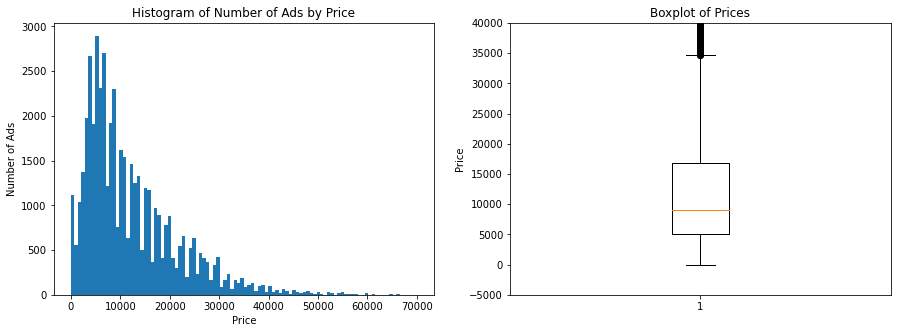

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.price, bins=100, range=(0,70000))
axs[0].set_title('Histogram of Number of Ads by Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.price)
axs[1].set_title('Boxplot of Prices')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Price')
axs[1].set_ylim([-5000,40000])

plt.show()

In [37]:
df[(df['price'] <2) & (df['days_listed'] <10)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow_posted,month_posted,year_posted,car_age,mileage_per_year
8228,1,2012,honda odyssey,3,6,gas,113400,automatic,mini-van,grey,0.0,2018-12-20,3,3,12,2018,6,16274
9174,1,2017,jeep grand cherokee,3,10,gas,42469,other,SUV,white,1.0,2018-07-23,9,0,7,2018,1,27308
9309,1,2017,ram 3500,3,10,gas,57482,other,truck,white,1.0,2019-03-17,3,6,3,2019,2,26080
9354,1,2014,gmc sierra,3,8,gas,147470,automatic,truck,brown,0.0,2018-12-29,9,5,12,2018,4,29545
9468,1,2018,gmc acadia,3,6,gas,23373,automatic,SUV,undefined,1.0,2018-09-04,8,1,9,2018,0,34702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45057,1,2016,chevrolet camaro,3,10,gas,48223,other,coupe,silver,1.0,2018-05-23,5,2,5,2018,2,20175
48868,1,2016,ram 3500,3,10,gas,43200,other,truck,white,1.0,2018-09-27,8,3,9,2018,2,15778
48871,1,2018,ford f-150,3,8,gas,47115,automatic,truck,black,1.0,2018-05-31,3,3,5,2018,0,114722
48875,1,2019,toyota highlander,3,6,gas,13138,automatic,SUV,undefined,1.0,2019-01-20,1,6,1,2019,0,252555


The data looks reasonable. Car sales peak around $10,000. There seem to be outliers on the higher end of the price ranges.

In [38]:
# determining the outliers and filtering them out of the dataset. 
# ONLY filtering out outliers beyond the upper limit

def outliers(column_name):
    global df
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    print("First quartile:", Q1)
    print("Third quartile:", Q3)

    IQR= Q3-Q1
    upper_limit = Q3+1.5*IQR
    print("Upper Limit: {}".format(upper_limit))
    lower_limit = Q3-1.5*IQR
    print("Lower Limit: {}".format(lower_limit))
    
    df = df[df[column_name] < upper_limit]

In [39]:
outliers('price')

First quartile: 5000.0
Third quartile: 16900.0
Upper Limit: 34750.0
Lower Limit: -950.0


The lower whisker above aligns to 0 while the upper whisker is $34,750. Based on this information, prices above 34,750 are considered outliers and were excluded from the data. This can be seen in the second histogram. For the purposes of this study, we will not be removing vehicles with seemingly abnormally low prices as most were listed on the site for a number of days. However, we are making a note of this should this issue need further attention at a later point. 

<ipython-input-40-bea3e04767ca>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


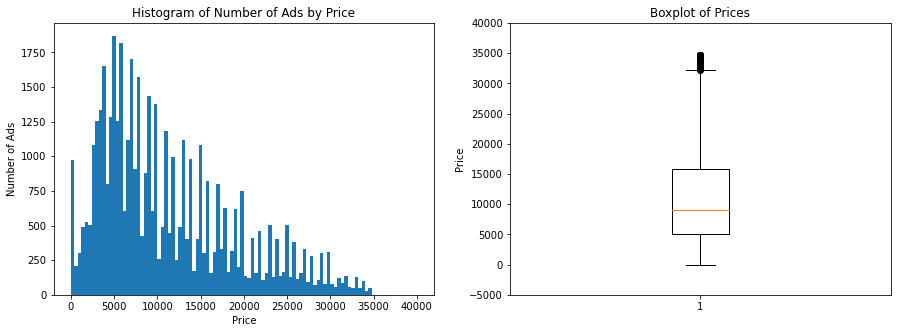

In [40]:
# plot with upper limit outliers removed

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.price, bins=100, range=(0,40000))
axs[0].set_title('Histogram of Number of Ads by Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.price)
axs[1].set_title('Boxplot of Prices')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Price')
axs[1].set_ylim([-5000,40000])

plt.show()

<a id='4.2'><a/>
## 4.2 Age
[Return to Table of Contents](#back)

<ipython-input-41-009f578c3a84>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


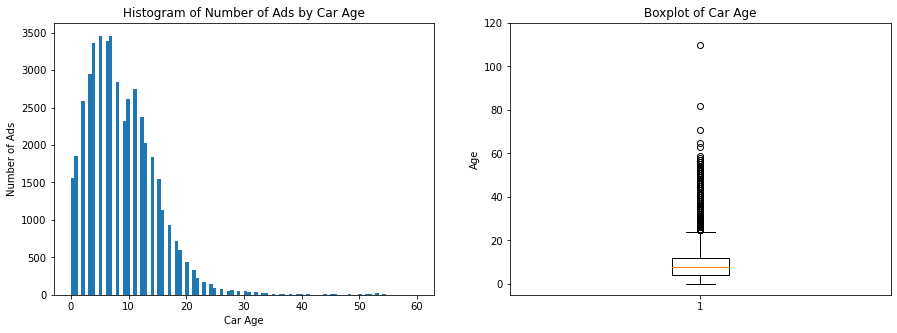

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.car_age, bins=100, range=(0,60))
axs[0].set_title('Histogram of Number of Ads by Car Age')
axs[0].set_xlabel('Car Age')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.car_age)
axs[1].set_title('Boxplot of Car Age')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Age')
axs[1].set_ylim([-5,120])

plt.show()

The data looks reasonable. After a vehicle reaches 8 years old, it is less likely to be sold, though there is a slight increase around the 10 year mark. Again, there are signifcant outliers which would impact our results.

In [42]:
outliers('car_age')

First quartile: 4.0
Third quartile: 12.0
Upper Limit: 24.0
Lower Limit: 0.0


Upper whisker is 24, above this age vehicle is considered an outlier and should be excluded from our data. Histogram with upper limit outliers removed is below.

<ipython-input-43-acfe2ee93904>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


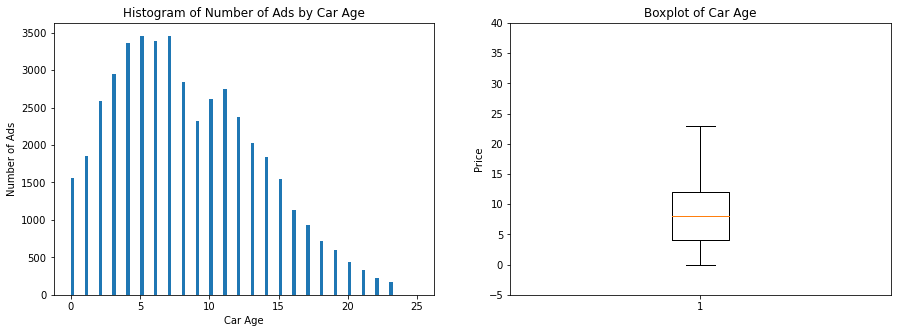

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.car_age, bins=100, range=(0,25))
axs[0].set_title('Histogram of Number of Ads by Car Age')
axs[0].set_xlabel('Car Age')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.car_age)
axs[1].set_title('Boxplot of Car Age')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Price')
axs[1].set_ylim([-5,40])

plt.show()

<a id='4.3'><a/>
## 4.3 Mileage
[Return to Table of Contents](#back)

<ipython-input-44-f4810076097b>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


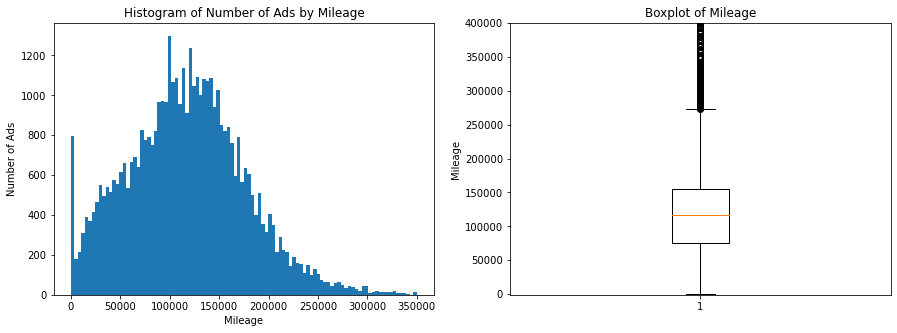

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.odometer, bins=100, range=(0,350000))
axs[0].set_title('Histogram of Number of Ads by Mileage')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.odometer)
axs[1].set_title('Boxplot of Mileage')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Mileage')
axs[1].set_ylim([-1000,400000])

plt.show()

Mileage seems to be more symmetrical with less outliers than the other categories, however, we will still filter out the outliers on the upper limit. Histogram with outliers removed is below. As we can see the graph did not change significantly.

In [45]:
outliers('odometer')

First quartile: 75000.0
Third quartile: 154412.0
Upper Limit: 273530.0
Lower Limit: 35294.0


<ipython-input-46-605c6d923607>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


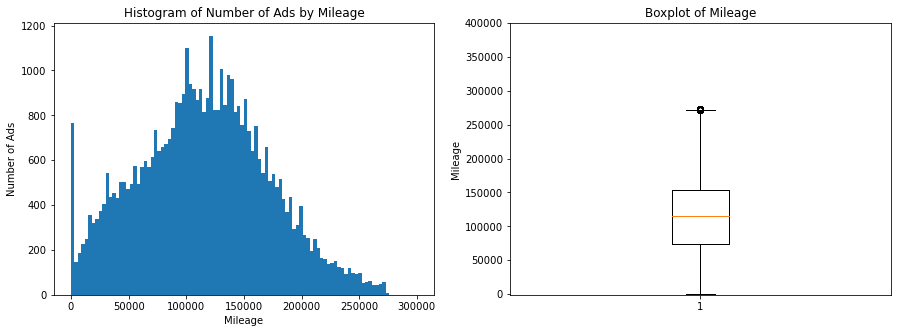

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.odometer, bins=100, range=(0,300000))
axs[0].set_title('Histogram of Number of Ads by Mileage')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.odometer)
axs[1].set_title('Boxplot of Mileage')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Mileage')
axs[1].set_ylim([-1000,400000])

plt.show()

<a id='4.4'><a/>
## 4.4 Cylinders
[Return to Table of Contents](#back)

<ipython-input-47-5f1b5fd41966>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


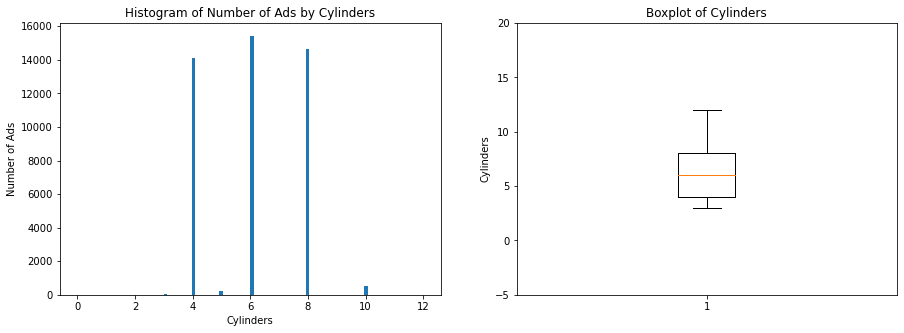

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.cylinders, bins=100, range=(0,12))
axs[0].set_title('Histogram of Number of Ads by Cylinders')
axs[0].set_xlabel('Cylinders')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.cylinders)
axs[1].set_title('Boxplot of Cylinders')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Cylinders')
axs[1].set_ylim([-5,20])

plt.show()

The data looks reasonable. Car sales by number of cylinders is largely evenly distributed between 4-8 cylinders. Cars with 3, 5 and 10 cylinders are rare. 10 to 12 cylinders are found in trucks.

In [48]:
outliers('cylinders')

First quartile: 4.0
Third quartile: 8.0
Upper Limit: 14.0
Lower Limit: 2.0


Theoretical upper whisker is 14 and lower whisker is 2. As we saw in the General Information section, the maximum number of cylinders in this dataset is 12 and the minimum is 3, therefore there were no outliers in the dataset here to be removed and thus the graph looks the same

<a id='4.5'><a/>
## 4.5 Condition
[Return to Table of Contents](#back)

<ipython-input-49-d99153014a1f>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


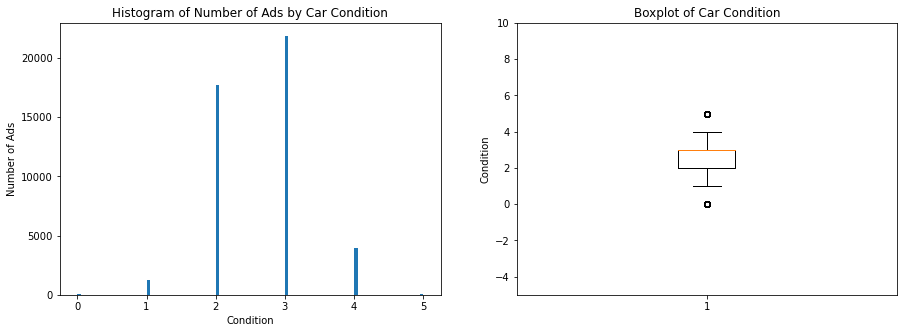

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.condition, bins=100, range=(0,5))
axs[0].set_title('Histogram of Number of Ads by Car Condition')
axs[0].set_xlabel('Condition')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.condition)
axs[1].set_title('Boxplot of Car Condition')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Condition')
axs[1].set_ylim([-5,10])

plt.show()

The data seems reasonable. Vehicle's with the conditions "Salvage", "Fair" and "Like New" are the least likely to appear.

In [50]:
outliers('condition')

First quartile: 2.0
Third quartile: 3.0
Upper Limit: 4.5
Lower Limit: 1.5


<ipython-input-51-d99153014a1f>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks([1], [''])


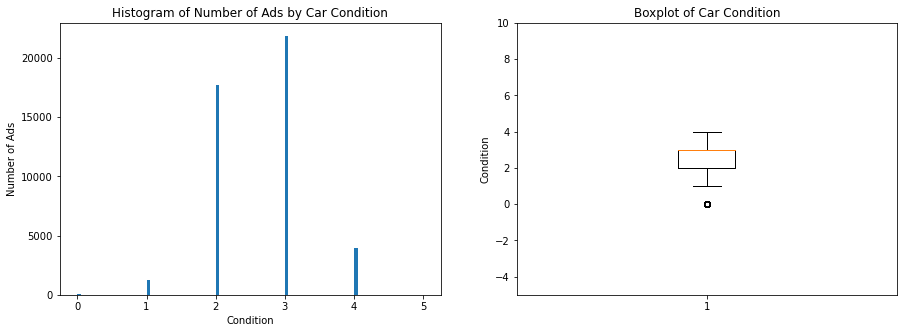

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(df.condition, bins=100, range=(0,5))
axs[0].set_title('Histogram of Number of Ads by Car Condition')
axs[0].set_xlabel('Condition')
axs[0].set_ylabel('Number of Ads')

axs[1].boxplot(df.condition)
axs[1].set_title('Boxplot of Car Condition')
axs[1].set_xticks([1], [''])
axs[1].set_ylabel('Condition')
axs[1].set_ylim([-5,10])

plt.show()

Upper whisker is 4.5. Anything outside of this range is an outlier and should be excluded from dataset. As we can see in the histogram above, we're no longer considering cars rated 5 and 6.

<a id='5'><a/>
# 5 Ad Analysis
[Return to Table of Contents](#back)

<a id='5.1'><a/>
## 5.1 Ad Lifetime
[Return to Table of Contents](#back)

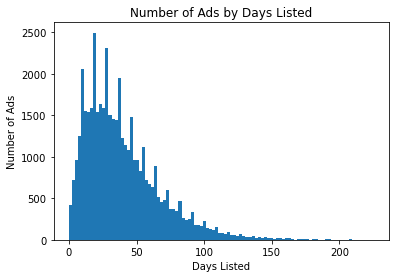

In [52]:
df.hist('days_listed', bins=100, range=(0,225), grid=False)

plt.title('Number of Ads by Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Number of Ads')
plt.show()

In [53]:
days_listed_average = df['days_listed'].mean()
days_listed_median = df['days_listed'].median()

print("Days listed average:",days_listed_average)
print("Days listed median:",days_listed_median)

Days listed average: 39.56402255555308
Days listed median: 33.0


In [54]:
standard_dev_days_listed=statistics.stdev(df['days_listed'])
one_standard_dev_below = days_listed_average - standard_dev_days_listed
print("Ad days one standard deviation below the average:",one_standard_dev_below)
one_standard_dev_above = days_listed_average + standard_dev_days_listed
print("Ad days one standard deviation above the average:",one_standard_dev_above)

Ad days one standard deviation below the average: 11.341316694211432
Ad days one standard deviation above the average: 67.78672841689473


In [55]:
ads_removed_quickly = len(df.query('@one_standard_dev_below > days_listed'))
ads_listed_long_time = len(df.query('@one_standard_dev_above < days_listed'))

ads_removed_quickly_as_a_percent = ads_removed_quickly / len(df['days_listed'])
ads_listed_long_time_as_a_percent = ads_listed_long_time / len(df['days_listed'])

print("Number of ads removed before the average:",ads_removed_quickly)
print("Number of ads removed before the average as a percentage of the whole: {:.2%}".format(ads_removed_quickly_as_a_percent))
print("Number of ads removed after the average:",ads_listed_long_time)
print("Number of ads removed after the average as a percentage of the whole: {:.2%}".format(ads_listed_long_time_as_a_percent))

Number of ads removed before the average: 5407
Number of ads removed before the average as a percentage of the whole: 12.05%
Number of ads removed after the average: 6581
Number of ads removed after the average as a percentage of the whole: 14.67%


An ad for a car is listed for on average 40 days before being taken down. ~27% of the total sample size was either listed one standard deviation above or below the average. 

<a id='5.2'><a/>
## 5.2 Ads by Vehicle Type
[Return to Table of Contents](#back)

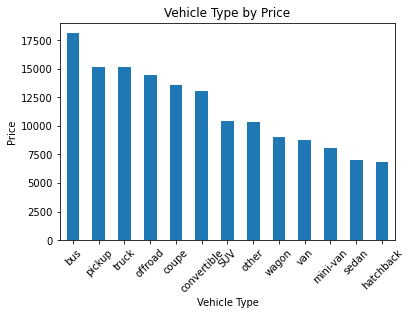

In [56]:
df.groupby('type')['price'].mean().sort_values(ascending=False).plot(kind='bar', rot=45, grid=False)

plt.title('Vehicle Type by Price')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.show()

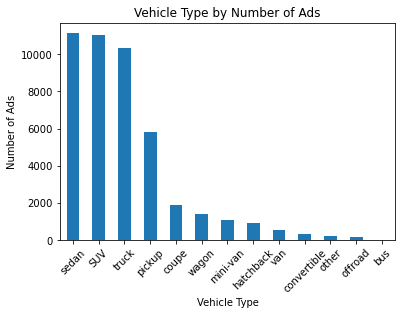

In [57]:
df['type'].value_counts().sort_values(ascending=False).plot(kind='bar',rot=45, grid=False)

plt.title('Vehicle Type by Number of Ads')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Ads')
plt.show()

SUVs and Sedans are in the bottom half of the sample according to price, but they have most number of ads. As such, for the rest of our analysis, we will focus on these two types of vehicles. 

<a id='5.3'><a/>
## 5.3 Factors that Impact Price
[Return to Table of Contents](#back)

In [58]:
suvs_only = df.query('type == "SUV"')


In [59]:
sedans_only = df.query('type == "sedan"')

In [60]:
# check to see how many rows (ie ads) there are

len(suvs_only)

11027

In [61]:
len(sedans_only)

11141

<a id='5.3.1'><a/>
### 5.3.1 Age
[Return to Table of Contents](#back)

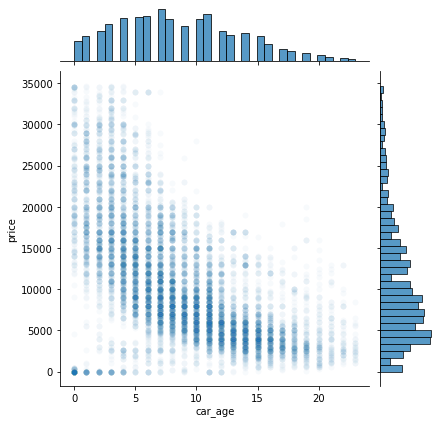

In [62]:
sns.jointplot(x='car_age', y='price', data=suvs_only, alpha=0.03)

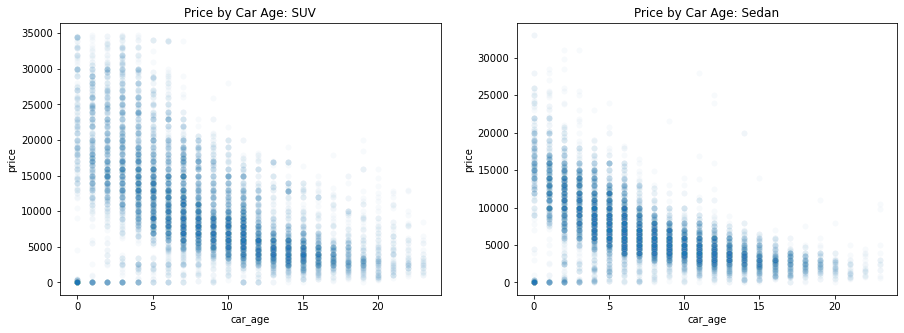

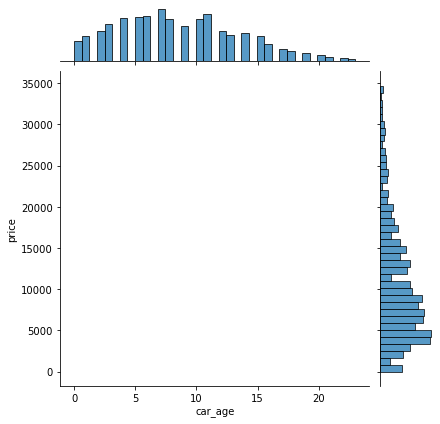

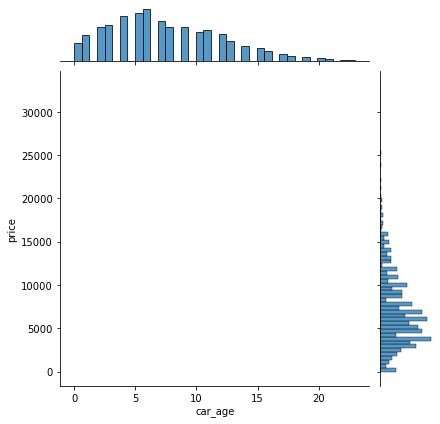

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.set_title('Price by Car Age: SUV')
sns.jointplot(x='car_age', y='price', data=suvs_only, ax=ax1, alpha=0.03)

ax2.set_title('Price by Car Age: Sedan')
sns.jointplot(x='car_age', y='price', data=sedans_only, ax=ax2, alpha=0.03)

plt.show()

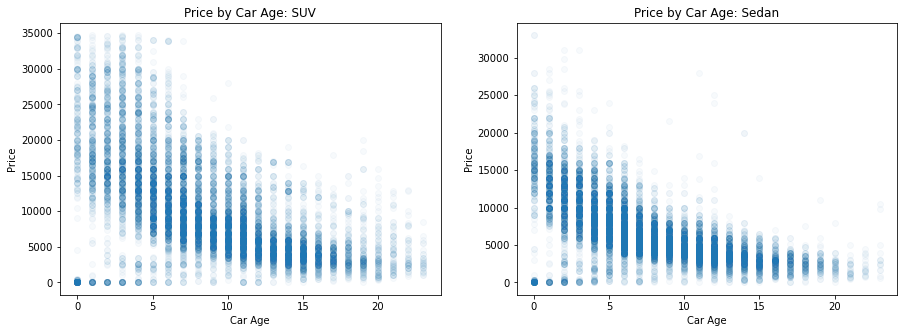

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(suvs_only['car_age'],suvs_only['price'],alpha=0.03) 
axs[0].set_title('Price by Car Age: SUV')
axs[0].set_xlabel('Car Age')
axs[0].set_ylabel('Price')

axs[1].scatter(sedans_only['car_age'],sedans_only['price'],alpha=0.03) 
axs[1].set_title('Price by Car Age: Sedan')
axs[1].set_xlabel('Car Age')
axs[1].set_ylabel('Price')

plt.show()

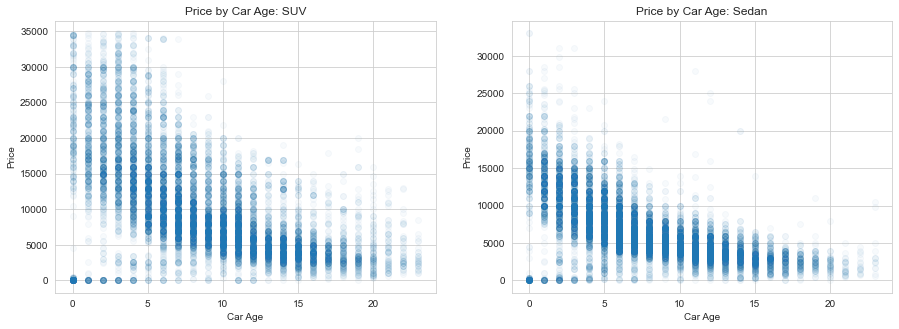

In [90]:
#axs[0].scatter(df[df.platform=='PS4']['critic_score'],df[df.platform=='PS4']['total_sales']) 

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(df[df.type=='SUV']['car_age'],df[df.type=='SUV']['price'],alpha=0.03) 
axs[0].set_title('Price by Car Age: SUV')
axs[0].set_xlabel('Car Age')
axs[0].set_ylabel('Price')

axs[1].scatter(sedans_only['car_age'],sedans_only['price'],alpha=0.03) 
axs[1].set_title('Price by Car Age: Sedan')
axs[1].set_xlabel('Car Age')
axs[1].set_ylabel('Price')

plt.show()

In [65]:
print("Correlation for SUVs:",suvs_only['car_age'].corr(suvs_only['price']))

Correlation for SUVs: -0.6020677380427412


In [66]:
print("Correlation for Sedans:",sedans_only['car_age'].corr(sedans_only['price']))

Correlation for Sedans: -0.6386148965196973


Prices for sedans are more negatively impacted by car age than SUVs, but only slightly

<a id='5.3.2'><a/>
### 5.3.2 Mileage
[Return to Table of Contents](#back)

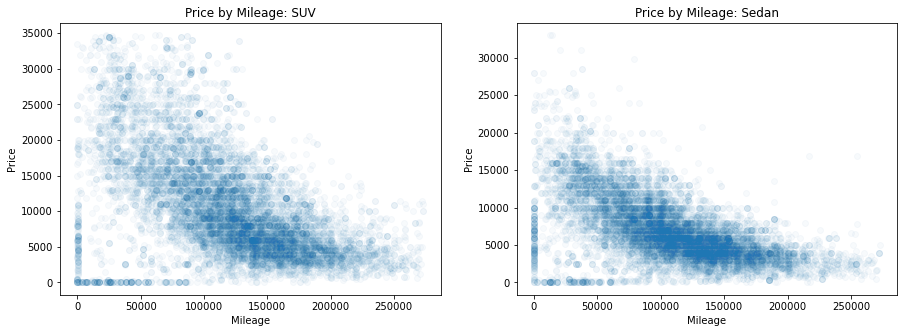

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(suvs_only['odometer'],suvs_only['price'],alpha=0.03) 
axs[0].set_title('Price by Mileage: SUV')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Price')

axs[1].scatter(sedans_only['odometer'],sedans_only['price'],alpha=0.03) 
axs[1].set_title('Price by Mileage: Sedan')
axs[1].set_xlabel('Mileage')
axs[1].set_ylabel('Price')

plt.show()

In [68]:
print("Correlation for SUVs:",suvs_only['odometer'].corr(suvs_only['price']))

Correlation for SUVs: -0.5235453928417352


In [69]:
print("Correlation for Sedans:",sedans_only['odometer'].corr(sedans_only['price']))

Correlation for Sedans: -0.5585791026699705


Prices for sedans are more negatively impacted by odometer than SUVs, but again, only slightly.

<a id='5.3.3'><a/>
### 5.3.3 Condition
[Return to Table of Contents](#back)

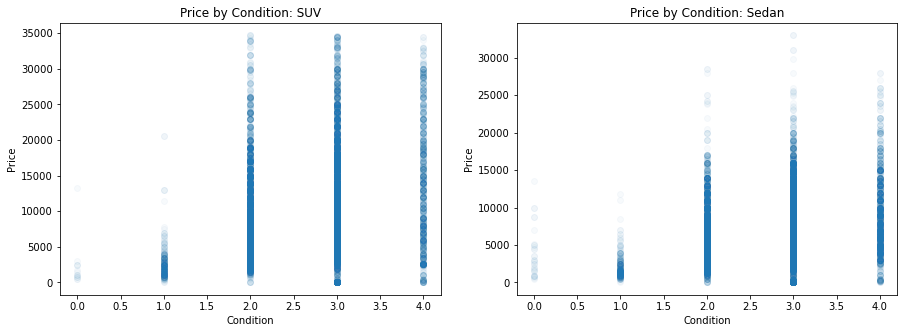

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(suvs_only['condition'],suvs_only['price'],alpha=0.03) 
axs[0].set_title('Price by Condition: SUV')
axs[0].set_xlabel('Condition')
axs[0].set_ylabel('Price')

axs[1].scatter(sedans_only['condition'],sedans_only['price'],alpha=0.03) 
axs[1].set_title('Price by Condition: Sedan')
axs[1].set_xlabel('Condition')
axs[1].set_ylabel('Price')

plt.show()

In [71]:
print("Correlation for SUVs:",suvs_only['condition'].corr(suvs_only['price']))

Correlation for SUVs: 0.2603333074996213


In [72]:
print("Correlation for Sedans:",sedans_only['condition'].corr(sedans_only['price']))

Correlation for Sedans: 0.2919657154807282


Prices for sedans are more positively impacted by a better condition than SUVs. 

Of age, mileage and condition, age has the strongest correlation (negative here) with price, meaning that the older the car, the lower the price. Odometer and  price also has a negative correlation; the more miles, the lower the price. Condition of the car has the weakest correlation, meaning that the condition doesn't have a large impact on the car.

<a id='5.3.4'><a/>
### 5.3.4 Transmission Type
[Return to Table of Contents](#back)

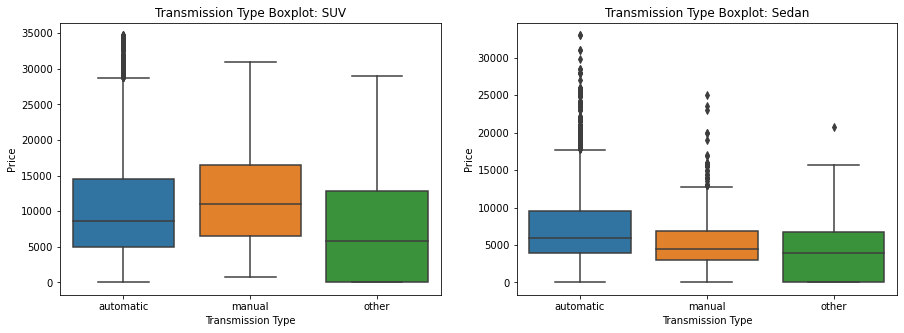

In [74]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y="price", x= "transmission", data=suvs_only, ax=axes[0])
axes[0].set_title('Transmission Type Boxplot: SUV')
axes[0].set_xlabel('Transmission Type')
axes[0].set_ylabel('Price')
sns.boxplot(y="price", x= "transmission", data=sedans_only, ax=axes[1])
axes[1].set_title('Transmission Type Boxplot: Sedan')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Price')

plt.show()

In [78]:
suvs_only[(suvs_only.transmission == "automatic")&(suvs_only.price<27000)].describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,dow_posted,month_posted,year_posted,car_age,mileage_per_year
count,10100.000000,10100.000000,10100.000000,10100.00000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,1.010000e+04
mean,9753.372178,2009.688911,2.674455,5.84495,121505.587327,0.692772,39.959703,2.999505,6.633762,2018.309109,8.619406,1.777055e+04
std,6122.006673,4.907548,0.674138,1.32190,54139.694513,0.461367,28.515606,2.006697,3.480361,0.462149,4.927909,4.586927e+04
min,1.000000,1995.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000e+00
25%,4995.000000,2007.000000,2.000000,4.00000,86461.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,1.097200e+04
50%,8450.000000,2010.000000,3.000000,6.00000,122800.000000,1.000000,34.000000,3.000000,7.000000,2018.000000,8.000000,1.419550e+04
75%,13900.000000,2013.000000,3.000000,6.00000,158454.000000,1.000000,54.000000,5.000000,10.000000,2019.000000,12.000000,1.888525e+04
max,26999.000000,2019.000000,4.000000,10.00000,273237.000000,1.000000,243.000000,6.000000,12.000000,2019.000000,23.000000,2.921940e+06


In [79]:
suvs_only[(suvs_only.transmission == "automatic")&(suvs_only.price>27000)].describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,dow_posted,month_posted,year_posted,car_age,mileage_per_year
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,30495.178977,2015.985795,3.102273,6.420455,52989.241477,0.840909,37.684659,2.894886,6.303977,2018.357955,2.369318,28161.789773
std,2151.017243,1.702126,0.671602,1.069884,30666.663093,0.366281,25.523242,2.048633,3.465119,0.480081,1.741065,39251.521251
min,27108.000000,2009.000000,2.000000,4.000000,80.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,37.000000
25%,28899.000000,2015.000000,3.000000,6.000000,28000.000000,1.000000,18.000000,1.000000,3.000000,2018.000000,1.000000,13570.500000
50%,29995.000000,2016.000000,3.000000,6.000000,43000.000000,1.000000,33.000000,3.000000,6.000000,2018.000000,2.000000,20991.500000
75%,32000.000000,2017.000000,4.000000,8.000000,76757.750000,1.000000,53.000000,5.000000,9.000000,2019.000000,3.000000,28012.500000
max,34700.000000,2019.000000,4.000000,8.000000,130000.000000,1.000000,157.000000,6.000000,12.000000,2019.000000,10.000000,453302.000000


Manual transmission sells for higher than automatic. Of note, there are a significant number of outliers for automatic vehicles. 

It is difficult to draw firm conclusions about transmission's impact on price as 'automoatic' and 'manual' transmission have similar boxplots, with 'other' distorting the conclusion as it is represents missing information. But comparing SUVs versus Sedans, SUVs sell for higher when the car is manual transmission, for sedans, the prices are higher when the car is automatic.

<a id='5.3.5'><a/>
### 5.3.5 Color
[Return to Table of Contents](#back)

When analyzing categorical variables, the categories must have at least 50 ads; otherwise, the parameters won't be valid for analysis. This did not need to be checked for transmission as we can safely assume that there more than 50 ads in the three categories, but we cannot assume this for color. We need to check the number of ads and drop those colors under 50 (which are yellow and purple for SUVS and purple, yellow and orange for sedans).

In [80]:
suvs_only['paint_color'].value_counts()

undefined    1995
black        1955
white        1720
silver       1414
grey         1070
blue          930
red           818
green         384
brown         316
custom        278
orange         70
yellow         40
purple         37
Name: paint_color, dtype: int64

In [81]:
suvs_only_50_plus_ads = suvs_only.query('paint_color not in ("purple", "yellow")').copy()
suvs_only_50_plus_ads['paint_color'] = suvs_only_50_plus_ads['paint_color'].cat.remove_unused_categories()

In [82]:
# check on number of ads
sedans_only['paint_color'].value_counts()

undefined    1996
silver       1894
black        1646
grey         1489
white        1389
blue         1126
red           871
custom        266
brown         233
green         181
purple         23
yellow         19
orange          8
Name: paint_color, dtype: int64

In [83]:
sedans_only_50_plus_ads = sedans_only.query('paint_color not in ("purple", "yellow", "orange")').copy()
sedans_only_50_plus_ads['paint_color'] = sedans_only_50_plus_ads['paint_color'].cat.remove_unused_categories()

<a id='5.3.5.1'><a/>
#### 5.3.5.1 SUV
[Return to Table of Contents](#back)

<AxesSubplot:xlabel='paint_color', ylabel='price'>

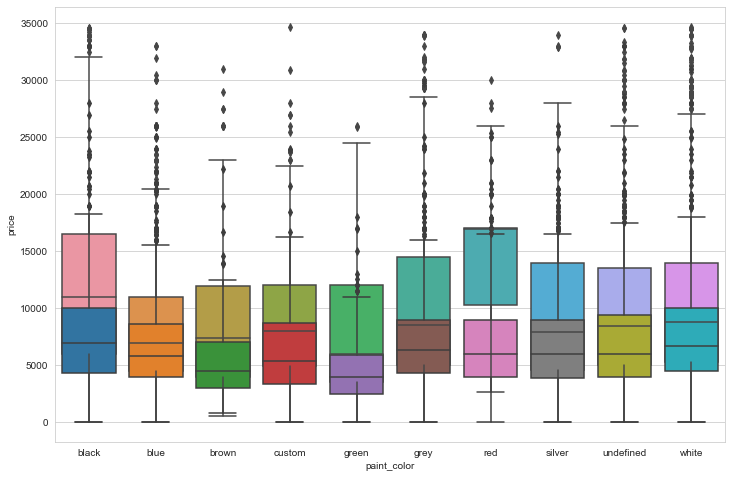

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x="paint_color", y="price", data=suvs_only_50_plus_ads, ax=ax)
sns.boxplot(x="paint_color", y="price", data=sedans_only_50_plus_ads, ax=ax)

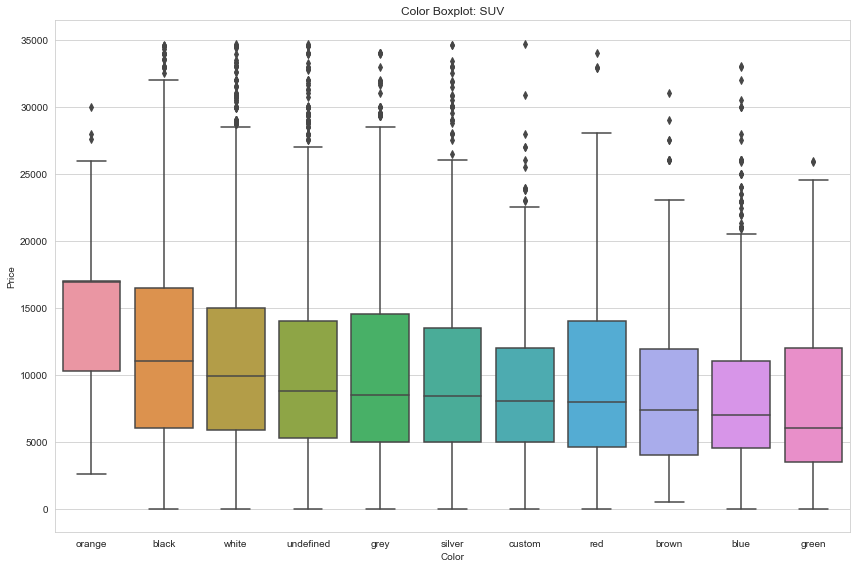

In [84]:
my_order_1 = suvs_only_50_plus_ads.groupby(['paint_color'])['price'].median().sort_values().iloc[::-1].index

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x="paint_color", y="price", data=suvs_only_50_plus_ads, ax=ax, order=my_order_1)

ax.set_title('Color Boxplot: SUV')
ax.set_xlabel('Color')
ax.set_ylabel('Price')

fig.tight_layout()

<a id='5.3.5.2'><a/>
#### 5.3.5.2 Sedan
[Return to Table of Contents](#back)

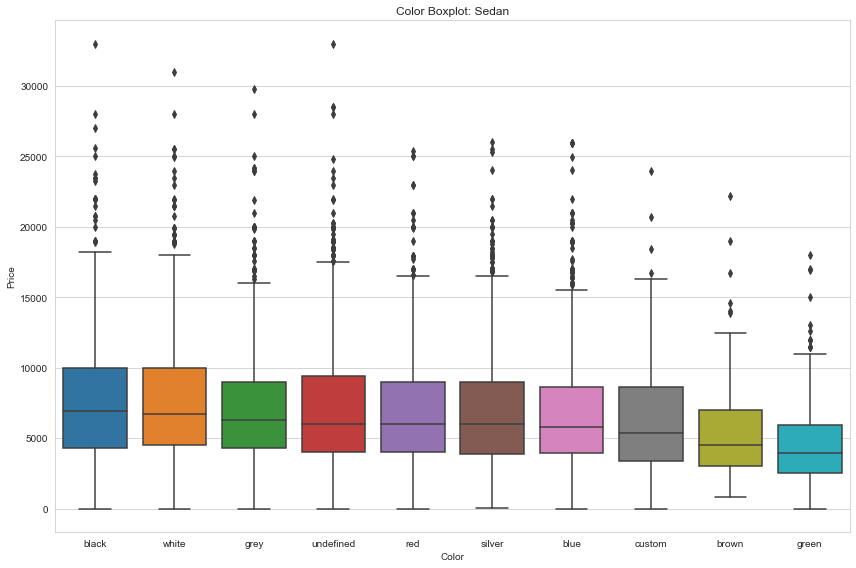

In [85]:
my_order_2 = sedans_only_50_plus_ads.groupby(['paint_color'])['price'].median().sort_values().iloc[::-1].index

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(x="paint_color", y="price", data=sedans_only_50_plus_ads, ax=ax, order=my_order_2)

ax.set_title('Color Boxplot: Sedan')
ax.set_xlabel('Color')
ax.set_ylabel('Price')

fig.tight_layout()

Strangely, colors that we might consider atypical for a car (e.g. orange), tend to sell for higher prices when the vehicle type is an SUV (there were only 9 orange sedans, so they couldnot be included in the study) also a black SUV sold better than other colors (whereas with a sedan, it sold for about the same. Lastly, SUVs have a  larger spread in terms of price range based on color than do sedans. As part of a further analysis, would be helpful to remove the outliers in the color category.

<a id='6'><a/>
# 6 General Conclusion
[Return to Table of Contents](#back)

**Data Preprocessing**

The bulk of the data processing work centered on filling missing values for model_year, cylinders, odometer, and paint_color. Missing values for paint_color were not be applied as choosing a paint color for a car is random; these were left as 'unknown'. For the other quantitative parameters, the data was filled based on correlations found. Model_year was replaced with model years from same models (the types of models change with the years). Cylinders was replaced with cylinder values for same vehicle types (the larger the car, the more cylinders). Odometer was replaced based on model year (as there is a negative correlation here).

**Exploratory Data Analysis**

Based on research conducted on over 50,000 ads, we can conclude that an ad for a car is listed for on average 40 days before being taken down. ~27% of the total sample size was either listed one standard deviation above or below the average. SUVs and sedans are the cars that are most frequently advertised (representing approx 40% of all adverts), though it is the larger vehicles (e.g. pickups, trucks) that sell for higher prices. 

**Factors that Impact Price**

Focusing on the most prevalent vehicle types by advertisements, age and milage negatively impact a sedan more than an SUV, but condition has a more positive impact for sedans than SUVs. Manual transmissions fetch for higher prices in SUVs than sedans and different colors can also bring higher prices for SUVs than sedans. Sedans prices generally stay within the same range irrespective of the color (though orange is a clear outlier for SUVs).